### Case Study  1b
    Date : 16th March 2019
    Instructor : Ahsan Umar 
# Traffic Police Stop 
>This case study explores a real-data of traffic stops stored and distributed under Stanford open policing project. The stops data was recorded for Rhode Island state in Usa. Each row in the dataset contains record of individual stops. Various variables such as reason for stop , outcome of stop , and demographic variable of driver appear as fileds. In this exercise we will use our newly learned indexing, boolean indexing , filtering and method chaining skills to answer some real and interesting questions. 



### Importing the Required Libraries
Often times data analysis requires manipulations that are out of bounds for python built-in capabilities. Hence we need to import these external libraries/packages. It is a standard practice to import the required libraries early on in the process (usually first two cells)

In [7]:
## Data Analysis Libraries
import pandas as pd
import numpy as np

## Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpl


### Importing Dataset
Source : Online Policing Project


In [8]:
ri=pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Exploring Meta Data of Rhode Island DataFrame

In order to make decisions such as which columns to keep and what kind of operations are possible on the dataset, it is important to understand the structure and data type(s) of the data i.e looking at *data about data* (Commonly knowns as MetaData ). Here we will look at the following steps ; 
> * Examining Number of Columns and Rows
> * Examining Name of Columns
> * Finding Number of Missing data
> * Checking Data Types of Data

In [39]:
ri.shape

(91741, 15)

 ### Instructors Note ###
> Method 2 is an example of method chaining where the data frame is first subjected to isnull() method. This method gets applied to individual dataframe columns and returns boolean vectors.Using the same logic the sum method on the output dataframe counts the number of True values in each vector and returns a value. The final result as shown is the series showing *number of null-values in each column* . you can also explore the 'info' method of the pandas.

>  In the next cell we are dividing these numbers by the total number of rows in the rhode island data frame. This is calculated by using the shape attribute if the dataframe. The index of 0 specifies that we only want the total number of rows as the divider. Recall that the shape attribute returns a tuple (row,column) as a result, whereas df.shape[0] will picks out only row.

In [61]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

#### Proportion of Null Values in Each Columns (Dividing the number of Null-Values by the number of rows in the entire dataset)

In [60]:
ri.isnull().sum()/ri.shape[0]

state                 0.000000
stop_date             0.000000
stop_time             0.000000
county_name           1.000000
driver_gender         0.056736
driver_race           0.056703
violation_raw         0.056703
violation             0.056703
search_conducted      0.000000
search_type           0.963953
stop_outcome          0.056703
is_arrested           0.056703
stop_duration         0.056703
drugs_related_stop    0.000000
district              0.000000
dtype: float64

*  Dropping Columns with High Missing Values

In [63]:
ri.drop('county_name',axis=1,inplace=True)

In [9]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
state                 91741 non-null object
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86536 non-null object
driver_race           86539 non-null object
violation_raw         86539 non-null object
violation             86539 non-null object
search_conducted      91741 non-null bool
search_type           3307 non-null object
stop_outcome          86539 non-null object
is_arrested           86539 non-null object
stop_duration         86539 non-null object
drugs_related_stop    91741 non-null bool
district              91741 non-null object
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+ MB


* Examining the data types of columns

## Analysis

In [67]:
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


##  What kind of violatons are captured in the dataset ? 

Which column should we seperate out as a series and What kind of series method do you think we should we apply to solve this ?

In [88]:
ri['violation_raw'].unique()

array(['Equipment/Inspection Violation', 'Speeding', 'Call for Service',
       nan, 'Other Traffic Violation', 'Registration Violation',
       'Special Detail/Directed Patrol', 'APB',
       'Motorist Assist/Courtesy', 'Suspicious Person',
       'Violation of City/Town Ordinance', 'Warrant',
       'Seatbelt Violation'], dtype=object)

### How many types of unique violation are there in the dataset ? 

In [71]:
ri['violation_raw'].nunique()

12

Since now we know that there are 12 different types of viloation, it wil helpful to know the frequency ofeach violation in the dataset . For this we will use value_counts() method of the series.

### What is the proportion of each unique violation in the dataset  ? 

In [81]:
ri['violation_raw'].value_counts()#.plot(kind='bar')

Speeding                            48424
Other Traffic Violation             16224
Equipment/Inspection Violation      10922
Registration Violation               3703
Seatbelt Violation                   2856
Special Detail/Directed Patrol       2467
Call for Service                     1392
Motorist Assist/Courtesy              205
Violation of City/Town Ordinance      181
APB                                    91
Suspicious Person                      56
Warrant                                18
Name: violation_raw, dtype: int64

## How many *females* were caught *speeding* ? 

In [93]:
#ri[ri]
ri[(ri['driver_gender']=='F') & (ri['violation_raw']=='Speeding')].shape

(15646, 15)

## What proportion of speeding violation  resulted in arrest 

In [ ]:
ri.loc[ri['violation_raw']=='Speeding', 'is_arrested'].value_counts(normalize=True)*100

## Is any one particular race more prone to arrest

In [111]:
ri[(ri['driver_race']!='Other')].groupby(['driver_race','violation_raw'])['is_arrested'].value_counts(normalize=True)

driver_race  violation_raw                     is_arrested
Asian        Call for Service                  False          0.785714
                                               True           0.214286
             Equipment/Inspection Violation    False          0.968037
                                               True           0.031963
             Motorist Assist/Courtesy          False          1.000000
             Other Traffic Violation           False          0.962264
                                               True           0.037736
             Registration Violation            False          0.956522
                                               True           0.043478
             Seatbelt Violation                False          0.942308
                                               True           0.057692
             Special Detail/Directed Patrol    False          0.982143
                                               True           0.017857
             Speed

## What is the Search Rate for each violation 

Since the data contains a column search_conducted , it will be useful to know out of all the stops for different violation what is the rate of search. We will use the tools we have learned to answer this question.

In [120]:
ri.groupby(['violation_raw'])['search_conducted'].value_counts(normalize=True)#[:,True].sort_values()

violation_raw                     search_conducted
APB                               False               0.824176
                                  True                0.175824
Call for Service                  False               0.923132
                                  True                0.076868
Equipment/Inspection Violation    False               0.935726
                                  True                0.064274
Motorist Assist/Courtesy          False               0.926829
                                  True                0.073171
Other Traffic Violation           False               0.942986
                                  True                0.057014
Registration Violation            False               0.906562
                                  True                0.093438
Seatbelt Violation                False               0.968487
                                  True                0.031513
Special Detail/Directed Patrol    False               0.989461
    

## What is the Search Rate by Gender ? 
This question can be answered by same technique applied above. The only addition would to add gender variable in the group by statement. This will insure that the final results are segemented by gender as well.  

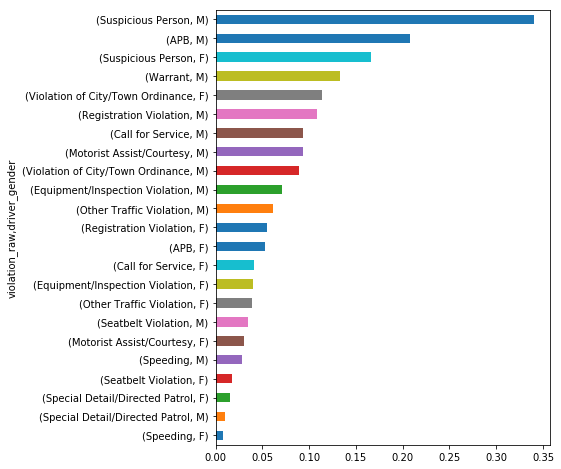

In [129]:
ri.groupby(['violation_raw','driver_gender'])['search_conducted'].value_counts(normalize=True)[:,:,True].sort_values().plot(kind='barh',figsize=(6,8))

## String Manipulation

## How many times the search was conducted becasue of Reasonable Suspicion ? 
Here we will make use of string accesseor to the series which will check each unique value against the criteria defines. The resultant value vill be Boolean data type.

In [142]:
ri['search_type'].str.contains('Suspicion',na=False).mean()

0.003433579315682192

### What Proprtion of Searches were conducted where atleast one cause was Reasonabale Suspicion ?
Here first we will filter the records that belong to the instance when the search was conducted. Next we are sub-setting to only the column 'search_type'. Once we have this series we are using series methods for string in pandas. The series string methods start with the *str* accessor followed by the actual method.

In [151]:
ri[ri['search_conducted']==True]['search_type'].str.contains('Suspicion',na=False).mean()

0.09525249470819473

##  Bring your Creative Sprit out ! 

### Using the Techniques presented above , can you utlize other columns in the dataframe and answer someother interesting questions.


> Hints : Utlize duration of stop , time of stop etc or try using violation_raw or search_conducted in more creative ways

In [174]:
ri

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
5,RI,2005-03-14,10:00,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
6,RI,2005-03-29,21:55,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
7,RI,2005-04-04,21:25,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
8,RI,2005-07-14,11:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
9,RI,2005-07-14,19:55,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
